In [7]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

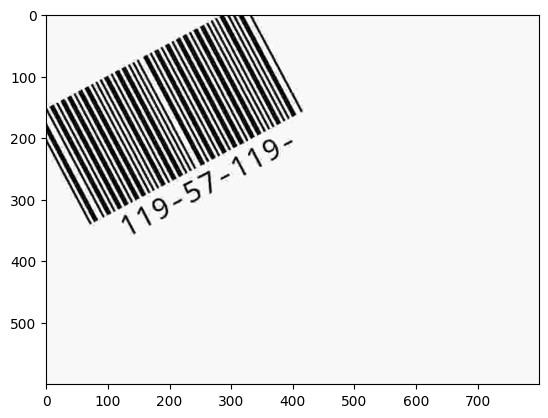

In [8]:
# Step 1: Load the image
image = cv2.imread('testcases/09 - e3del el soora ya3ammm.jpg')
plt.imshow(image)

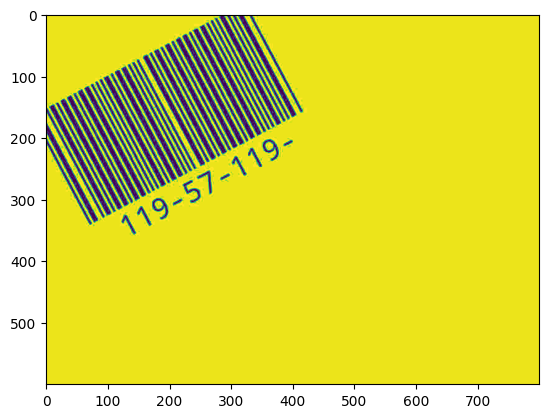

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [10]:
# Step 2: Detect edges to find the barcode orientation
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
angle = 0

In [11]:
# Calculate rotation angle
if lines is not None:
    for rho, theta in lines[0]:
        angle = (theta * 180 / np.pi) - 180
        break  # Only consider the first detected line

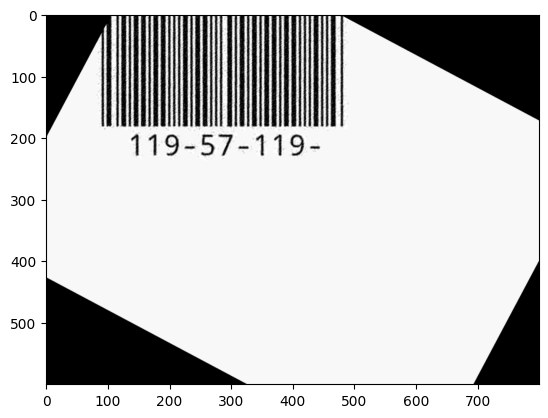

In [12]:
# Step 3: Rotate the image to align the barcode horizontally
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
plt.imshow(rotated)